# How to generate likelihood profiles for a fitted spectrum?

In this tutorial we will learn how to generate likelihood profiles for a spectrum using `csspec`. This is done by running `csspec` with non-zero values for the `dll_sigstep` and `dll_sigmax` parameters. As we'll see, the results can then be plotted using the `show_spectrum.py` example script.

## The preliminary data/fit
Before we can demonstrate how to generate the likelihood profiles, we need to first simulate some data to work with. For this example we will simulate four hours on a simple Crab source. Once we have the simulated Crab data we will fit the model back to the data. This fitted model will be used to generate the SED and likelihood profile in the next section.

In [1]:
# Load the modules
import gammalib
import ctools
import cscripts

# Define the ctools install directory
import os
ct_dir = os.environ['CTOOLS']
os.environ['CALDB'] = ct_dir + '/share/caldb/'

In [2]:
# Configure some preliminary variables
inmodel = ct_dir + '/share/models/crab.xml'
caldb   = 'prod2'
irf     = 'North_5h'
emin    = 0.1
emax    = 100

In [3]:
# Simulate some data
sim = ctools.ctobssim()
sim['inmodel'] = inmodel
sim['caldb']   = caldb
sim['irf']     = irf
sim['edisp']   = False
sim['outevents'] = 'outfile.fits'
sim['prefix']  = 'sim_events_'
sim['ra']      = 83.63
sim['dec']     = 22.151
sim['rad']     = 5
sim['tmin']    = 0
sim['tmax']    = 7200
sim['emin']    = emin
sim['emax']    = emax
sim['deadc']   = 0.98

# Run the simulation (prevents writing to disk)
sim.run()

In [4]:
# Fit the data
fitter = ctools.ctlike(sim.obs())
fitter['edisp'] = False
fitter.run()

## Generate the likelhood profiles
Now that we have a fitted source model and observations we can generate the sample of likelihood profiles.

In [5]:
# Configure csspec
sed = cscripts.csspec(fitter.obs())
sed['outfile']  = 'sed_likelihood_profile.fits'
sed['caldb']    = caldb
sed['irf']      = irf
sed['srcname']  = 'Crab'
sed['emin']     = emin
sed['emax']     = emax
sed['enumbins'] = 10
sed['debug']    = True

# Parameters that control the likelihood profile generation
sed['dll_sigstep'] = 1
sed['dll_sigmax']  = 5

# Execute csspec & save results to file
sed.execute()

Now that we have a fitted SED, we can generate a plot from the results. A simple way to accomplish this is by using the `show_spectrum.py` example script. 

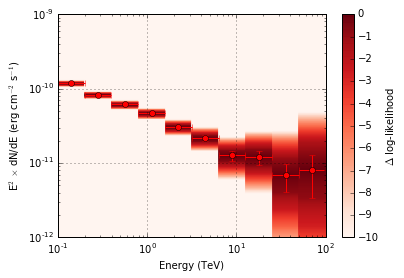

In [6]:
# Add the examples script directory to the path
import sys
sys.path.append(ct_dir + '/share/examples/python/')

# Plot the SED and likelihood profile
import show_spectrum as show_spectrum
show_spectrum.plot_spectrum(sed['outfile'].filename(), '')

In the above image we can see the spectral points that are produced by `csspec`. Additionally, behind the spectral points we can see the profiled likelihood values. These are plotted as the change in log-likelihood as a function of differential flux.